------------------------------------------
# exercicio 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata

sns.set_theme(style="darkgrid")
%matplotlib inline

In [5]:
df = pd.read_csv('../dados/lista_de_especies.txt', 
                 header=None)
df.columns = ['individuos']

df.groupby(by='individuos').count()


""
individuos
Brevoortia pectinata
Menticirrhus littoralis
Mugil curema
Mugil gaimardianus
Mugil platanus
Odonthestes bonariensis
Trachinotus marginatus


In [2]:
df = pd.read_csv('../dados/lista_de_especies.txt', 
                 header=None)
df.columns = ['individuos']

# moldando o dataframe 
data = df['individuos'].value_counts(dropna=False).to_frame()

# riqueza: número de espécies:
print(f"A riqueza da amostra é: {data.index.shape[0]}")
print("="*30)
# abundancia: qtd de indivíduos por espécie
print(f"A abundância da amostra é: \n")
print(data)

A riqueza da amostra é: 7
A abundância da amostra é: 

                         ind
Trachinotus marginatus    88
Mugil platanus            63
Mugil curema              52
Menticirrhus littoralis   47
Mugil gaimardianus        33
Odonthestes bonariensis   27
Brevoortia pectinata      15


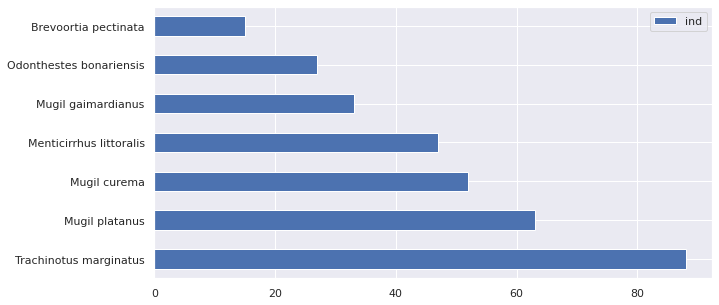

In [3]:
ax = data.plot(kind='barh', figsize=(10,5))

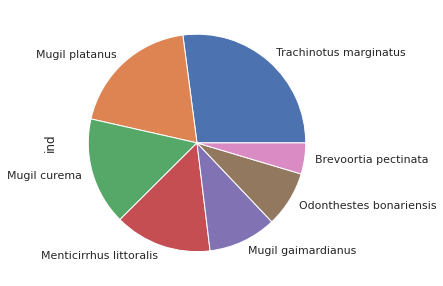

In [4]:
axes = data.plot(kind='pie', subplots=True, 
                 legend=False, figsize=(10,5))

------------------------------------------
# 2) Conjunto de dados de pesca de salmão


- um boxplot, para cada ano em subplot, do estágio de maturidade dos indivíduos (eixo x) com o peso molhado (eixo y)
    - monte uma função para extrair registros para cada ano
    - monte um subplot com 4 eixos de imagem, um para cada ano, sendo 2 colunas e 2 linhas
    - customize ao seu estilo

- gráfico barras com peso molhado no eixo y, classificadods por sexo (grupos de colunas) e por maturidade (minigrupos de colunas)

**tempo de execução**: 20min

**pacotes.métodos utilizados**: 

    - numpy.nan
    - pandas.DataFrame.mean
    - pandas.DataFrame.std
    - pandas.Series.str.lower
    - pandas.Series.str.upper
    - pandas.DataFrame.dropna
    - seaborn.boxplot
    - seaborn.catplot


In [5]:
def controleQualidade(da):
    limite_superior = da.mean() + 3*da.std()
    limite_inferior = da.mean() - 3*da.std()
    
    da[da > limite_superior] = np.nan
    da[da < limite_inferior] = np.nan
    
    return da

In [6]:
# carregando dataset de salmão capturados no Pacífico Norte: https://www.bco-dmo.org/dataset/3106
fish = pd.read_csv('https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3106.csv',
                  dtype={'haul_id': int, 'weight_wet': float, 'length_wet': float, 'depth_w': float,
                         'sex': str, 'maturity': str, 'species_common_name': str},
                  skiprows=[1,2],
                  usecols=[0, 3, 9, 10, 12, 14, 15, 16])

# consertar string (tudo para lowercase)
fish['sex'] = fish['sex'].str.upper()
fish['maturity'] = fish['maturity'].str.upper()
fish['species_common_name'] = fish['species_common_name'].str.lower()

# controle de qualidade
fish['length_wet'] = controleQualidade(fish['length_wet'].values)
fish['weight_wet'] = controleQualidade(fish['weight_wet'].values)

# remove linhas com NaN
fish = fish.dropna(how='any')

In [ ]:
def extrair_por_ano(df, year):
    return df[df['year'] == year]

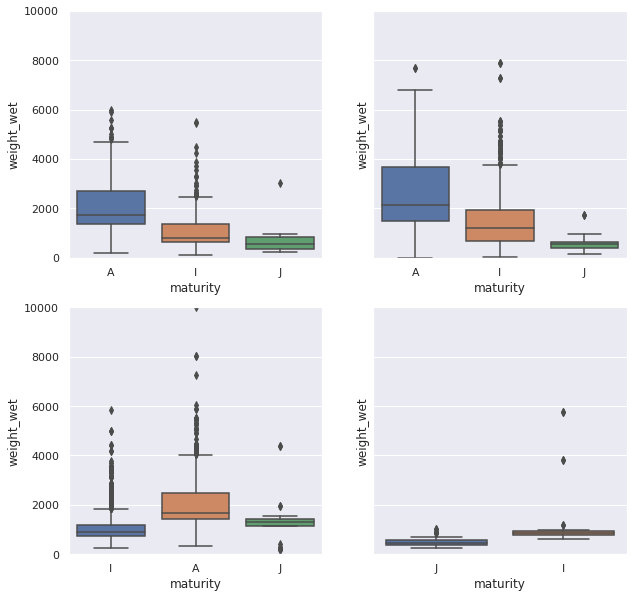

In [9]:
years = fish['year'].unique()
fig,axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharey=True)

for year,ax in zip(years, axes.ravel()):
    # filtrar por ano
    dftmp = extrair_por_ano(fish, year)
    # plotar
    ax = sns.boxplot(x='maturity', 
                     y='weight_wet', 
                     data=dftmp, ax=ax)

# customizar limites
_ = [ax.set_ylim([0, 10000]) for ax in axes.ravel()]

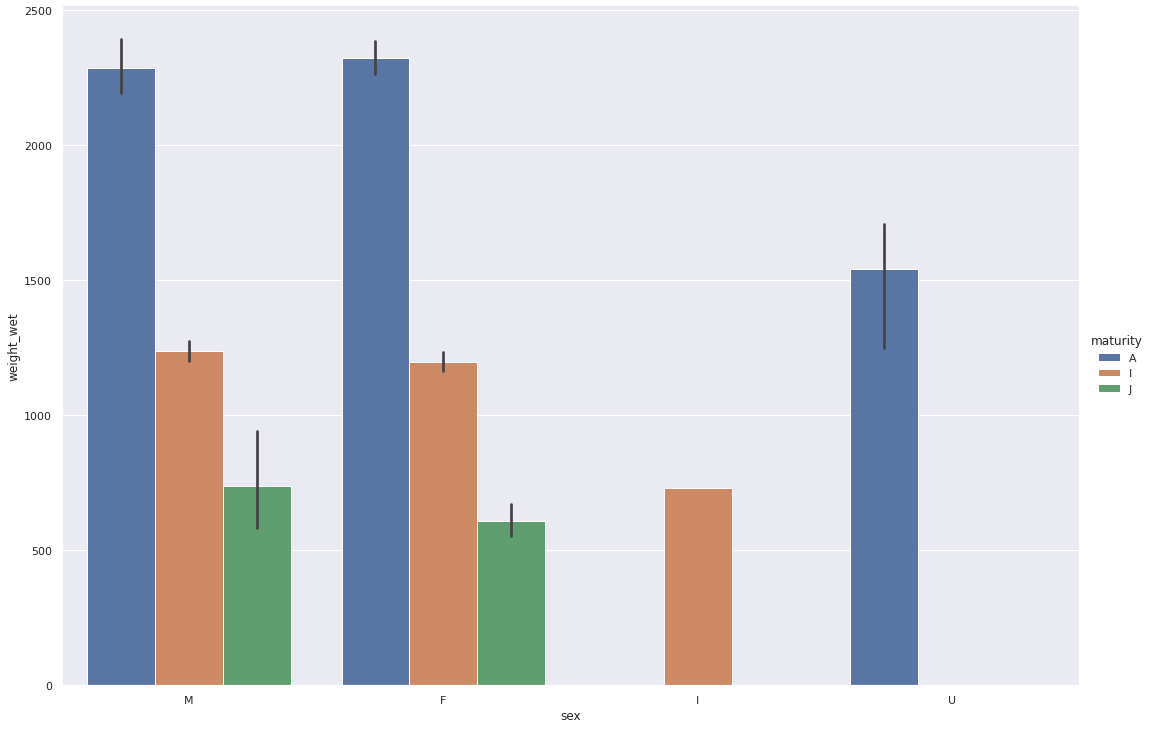

In [10]:
data = fish.dropna(how='any', axis=0)

sns.catplot(x="sex", y="weight_wet",
                hue="maturity",
                data=data, kind="bar",
                height=10, aspect=1.5);

------------------------------
# 3) interpolação de dados pontuais esparsos para grade regular

Supondo que acabamos de voltar do trabalho de campo, onde foi realizado o levantamento topográfico de uma praia. Precisamos agorar tratar estes dados, obtidos duramente em um dia quente. 

Com o conjunto, totalmente fictício, fornecido abaixo, utilize o pacote ```scipy.interpolate.griddata``` para interpolar os pontos espalhados para um campo 2D. Tente usar diversos métodos de interpolação, como ```linear``` ou ```cubic``` para avaliar o ganho de informação.

Se possível, adicione uma máscara fictícia e veja o que acontece.

Plote um gráfico com o campo interpolado em ```pcolormesh``` e os pontos aleatórios em ```scatter```.

**tempo de execução**: 20min

**pacotes.métodos utilizados**: 

    - numpy.nan
    - numpy.arange
    - numpy.meshgrid
    - numpy.random.random
    - scipy.interpolate.griddata
    - matplotlib.pyplot.pcolormesh
    - matplotlib.pyplot.scatter

In [12]:
# coordenadas e valores de forma randômica
x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)


In [13]:
# grade a ser interpolado
xi = yi = np.arange(0,1.01,0.01)
xi,yi = np.meshgrid(xi,yi)


In [14]:
# criando uma máscara em uma região (ex: ilha)
mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolacao
zi = griddata((x,y),          # grade original
              z,              # informação a ser interpolada
              (xi,yi),        # grade nova
              method='linear') # metodo de interpolação

# criando uma ilha no meio da grade
zi[mask] = np.nan


Text(0, 0.5, 'yi')

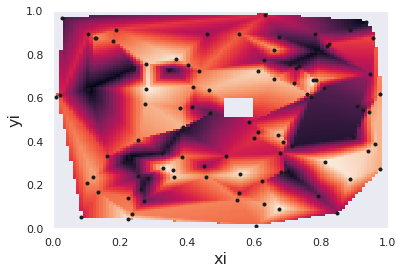

In [15]:
# visualizar
fig = plt.figure()
ax = fig.add_subplot(111)
plt.pcolormesh(xi, yi, zi)
# plt.contourf(xi, yi, zi, np.arange(np.nanmin(zi)+0.01,np.nanmax(zi)+0.01,0.01)
plt.plot(x, y,' k.')
plt.xlabel('xi', fontsize=16)
plt.ylabel('yi', fontsize=16)

Text(0, 0.5, 'yi')

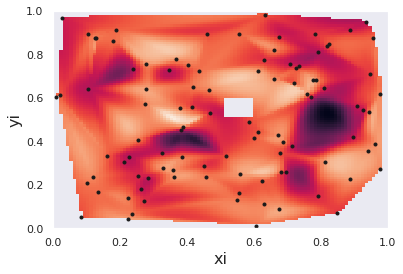

In [17]:
# metodo de interpolação: cubic
zi = griddata((x,y),          # grade original
              z,              # informação a ser interpolada
              (xi,yi),        # grade nova
              method='cubic') # metodo de interpolação

# criando uma ilha no meio da grade
zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.pcolormesh(xi, yi, zi)
# plt.contourf(xi, yi, zi, np.arange(np.nanmin(zi)+0.01,np.nanmax(zi)+0.01,0.01)
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)

------------------
# 4) seções verticais

Utilizando o conjunto de dados do Mercator fornecido no diretório ```../dados/``` (ou para baixar no link abaixo), elabore uma figura de seção vertical de temperatura e salinidade.

**tempo de execução**: 20min

In [ ]:
ds = xr.open_dataset('../dados/')

----------------------------

# Kriging para dados de topografia de praia reais

In [18]:
# para instalar, caso necessário
# !pip install scikit-gstat
# !conda install -c conda-forge pykrige -y

In [ ]:
from skgstat import Variogram, OrdinaryKriging
from pykrige.ok import OrdinaryKriging

# dados Luiza
df = pd.read_csv('../dados/150422_S.csv', delimiter=';', 
                 decimal=',')

# subamostrar
df = df[::5]

df['Lat'] = df['Lat'].astype(float)
df['Lon'] = df['Lon'].astype(float)
df['Altura C'] = df['Altura C'].astype(float)
df['Lon UTM'] = df['Lon UTM'].astype(float)
df['Lat UTM'] = df['Lat UTM'].astype(float)



lon = df['Lon UTM'].values
lat = df['Lat UTM'].values
z = df['Altura C'].values

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(13, 9))
art = ax.scatter(data.x,data.y, s=50, c=data['z'].values, cmap='plasma')
plt.colorbar(art)

V = Variogram(data[['x', 'y']].values, data.z.values, normalize=False, maxlag=60, n_lags=15)

ok = OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')

# build the target grid
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

